<a href="https://colab.research.google.com/github/aldodec/Time_Series_Analysis/blob/master/Seasonality_Tutorial_Statsmodels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

## based on https://towardsdatascience.com/how-to-find-seasonality-using-python-73547ebf322

In [15]:
## We will analyize the number of crimes (breaking and entering) per month.


## Dataset from:
## https://data.kcmo.org/dataset/Kansas-City-Crime-NIBRS-Summary/6wc4-sd7p

path = '/content/drive/MyDrive/Kansas_City_Crime__NIBRS__Summary.csv'
df = pd.read_csv(path)
df.head()

,Date,Calendar Year,Fiscal Year Date/Time,Homicide Offenses,"Sex Offenses, Forcible",Assault Offenses,"Sex Offenses, Non-forcible",Kidnapping/Abduction,Robbery,Arson,Extortion/Blackmail,Burglary/Breaking and Entering,Larceny/Theft Offenses,Motor Vehicle Theft,Fraud Offenses,Counterfeiting/Forgery,Embezzlement,Stolen Property Offenses,Destruction/Damage/Vandalism,Bribery,Drug/Narcotic Offenses,Gambling Offenses,Prostitution Offenses,Pornography/Obscene Material,Weapon Law Violations,Total Crimes Against Persons,Total Crimes Against Property,Total Crimes Against Society
0,04/30/2013 12:00:00 AM,2013,04/30/2013 12:00:00 AM,8,34,922,1,4,147,11,0,522,1185,319,121,30,12,21,399,0,299,0,11,1,45,969,2767,356
1,10/31/2017 12:00:00 AM,2017,04/30/2018 12:00:00 AM,10,41,959,1,5,151,15,1,383,1103,395,106,42,21,40,454,0,235,0,10,2,27,1016,2711,274
2,07/31/2016 12:00:00 AM,2016,04/30/2017 12:00:00 AM,9,35,1322,2,12,210,21,2,489,1241,395,137,40,20,24,553,0,312,0,12,0,45,1380,3132,369
3,10/31/2013 12:00:00 AM,2013,04/30/2014 12:00:00 AM,7,31,918,2,4,144,13,0,576,1313,411,133,46,22,15,403,0,309,0,16,1,53,962,3076,379
4,11/30/2013 12:00:00 AM,2013,04/30/2014 12:00:00 AM,6,36,820,1,1,154,24,0,531,1130,316,139,36,14,12,380,0,287,0,3,0,27,864,2736,317


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Date                            66 non-null     object
 1   Calendar Year                   66 non-null     int64 
 2   Fiscal Year Date/Time           66 non-null     object
 3   Homicide Offenses               66 non-null     int64 
 4   Sex Offenses, Forcible          66 non-null     int64 
 5   Assault Offenses                66 non-null     int64 
 6     Sex Offenses, Non-forcible    66 non-null     int64 
 7   Kidnapping/Abduction            66 non-null     int64 
 8   Robbery                         66 non-null     int64 
 9   Arson                           66 non-null     int64 
 10  Extortion/Blackmail             66 non-null     int64 
 11  Burglary/Breaking and Entering  66 non-null     int64 
 12  Larceny/Theft Offenses          66 non-null     int6

In [17]:
df.describe()

,Calendar Year,Homicide Offenses,"Sex Offenses, Forcible",Assault Offenses,"Sex Offenses, Non-forcible",Kidnapping/Abduction,Robbery,Arson,Extortion/Blackmail,Burglary/Breaking and Entering,Larceny/Theft Offenses,Motor Vehicle Theft,Fraud Offenses,Counterfeiting/Forgery,Embezzlement,Stolen Property Offenses,Destruction/Damage/Vandalism,Bribery,Drug/Narcotic Offenses,Gambling Offenses,Prostitution Offenses,Pornography/Obscene Material,Weapon Law Violations,Total Crimes Against Persons,Total Crimes Against Property,Total Crimes Against Society
count,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.0,66.000000,66.0,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000
mean,2014.575758,9.151515,39.712121,1012.590909,1.818182,5.075758,147.863636,18.712121,0.303030,459.575758,1143.545455,331.454545,133.363636,42.030303,15.303030,19.787879,422.151515,0.0,306.303030,0.0,9.969697,1.045455,41.257576,1068.500000,2734.409091,358.545455
std,1.627273,4.144477,7.540180,151.055464,1.287921,3.283106,26.014130,5.428600,0.580973,95.766874,155.189530,49.271987,26.668700,10.649622,4.053374,7.201528,55.686276,0.0,62.599083,0.0,6.471166,1.129082,10.456225,158.652717,313.114380,69.683059
min,2012.000000,1.000000,23.000000,649.000000,0.000000,0.000000,88.000000,4.000000,0.000000,255.000000,801.000000,226.000000,88.000000,21.000000,7.000000,6.000000,309.000000,0.0,181.000000,0.0,0.000000,0.000000,18.000000,688.000000,1942.000000,215.000000
25%,2013.000000,6.000000,34.000000,919.000000,1.000000,2.250000,135.250000,15.250000,0.000000,391.500000,1032.250000,305.000000,118.000000,35.000000,12.250000,15.000000,381.250000,0.0,267.500000,0.0,6.000000,0.000000,35.000000,963.750000,2576.500000,317.500000
50%,2015.000000,9.000000,39.500000,1007.500000,2.000000,5.000000,151.500000,19.000000,0.000000,444.500000,1132.500000,333.500000,132.500000,39.000000,16.000000,18.000000,417.000000,0.0,299.500000,0.0,9.500000,1.000000,40.000000,1072.000000,2745.500000,353.500000
75%,2016.000000,11.000000,45.000000,1118.000000,2.750000,7.750000,163.750000,21.000000,0.000000,534.750000,1274.000000,371.750000,145.000000,47.000000,18.000000,23.000000,460.500000,0.0,343.750000,0.0,13.000000,2.000000,47.000000,1174.250000,2974.500000,397.750000
max,2017.000000,21.000000,57.000000,1325.000000,6.000000,14.000000,210.000000,31.000000,2.000000,688.000000,1430.000000,434.000000,266.000000,71.000000,24.000000,40.000000,591.000000,0.0,491.000000,0.0,39.000000,4.000000,65.000000,1399.000000,3266.000000,550.000000


In [18]:
df.columns

Index(['Date', 'Calendar Year', 'Fiscal Year Date/Time', 'Homicide Offenses',
       'Sex Offenses, Forcible', 'Assault Offenses',
       '  Sex Offenses, Non-forcible ', 'Kidnapping/Abduction', 'Robbery',
       'Arson', 'Extortion/Blackmail', 'Burglary/Breaking and Entering',
       'Larceny/Theft Offenses', 'Motor Vehicle Theft', 'Fraud Offenses',
       'Counterfeiting/Forgery', 'Embezzlement', 'Stolen Property Offenses',
       'Destruction/Damage/Vandalism', 'Bribery', 'Drug/Narcotic Offenses',
       'Gambling Offenses', 'Prostitution Offenses',
       'Pornography/Obscene Material', 'Weapon Law Violations',
       'Total Crimes Against Persons', 'Total Crimes Against Property',
       'Total Crimes Against Society'],
      dtype='object')

In [20]:
df = df[['Date','Burglary/Breaking and Entering']]
df.head()

,Date,Burglary/Breaking and Entering
0,04/30/2013 12:00:00 AM,522
1,10/31/2017 12:00:00 AM,383
2,07/31/2016 12:00:00 AM,489
3,10/31/2013 12:00:00 AM,576
4,11/30/2013 12:00:00 AM,531


In [26]:
## We normalize the data by dividing the number of crimes per month by the number of days

df['Burglary/Breaking and Entering'] = df['Burglary/Breaking and Entering']/(pd.to_datetime(df['Date']).dt.day)

In [29]:
## We set the index to be the date column.

## We will create a helper function

def set_date_index(input_df, col_name = 'Date'):

  modified_df = input_df.copy()

  modified_df[col_name] = pd.to_datetime(modified_df[col_name]) 

  modified_df.sort_values(col_name, inplace = True)
  modified_df.set_index(col_name, inplace = True)

  return modified_df
  

In [30]:
df = set_date_index(df,'Date')
df

,Burglary/Breaking and Entering
Date,
2012-05-31,22.193548
2012-06-30,19.933333
2012-07-31,19.129032
2012-08-31,20.322581
2012-09-30,18.133333
...,...
2017-06-30,12.766667
2017-07-31,13.225806
2017-08-31,12.677419


In [ ]:
## We use statsmodels for time decomposition:

from statsmodels.tsa.seasonal import seasonal_decompose

sd = seasonal_decompose(df,freq=12)

In [45]:
sd.observed

,Burglary/Breaking and Entering
Date,
2012-05-31,22.193548
2012-06-30,19.933333
2012-07-31,19.129032
2012-08-31,20.322581
2012-09-30,18.133333
...,...
2017-06-30,12.766667
2017-07-31,13.225806
2017-08-31,12.677419


In [46]:
## We create a helpers function for time-decomposed columns

def combine_seasonal_cols(input_df,seasonal_model_results):

  input_df['observed'] = seasonal_model_results.observed
  input_df['residual'] = seasonal_model_results.resid
  input_df['seasonal'] = seasonal_model_results.seasonal
  input_df['trend'] = seasonal_model_results.trend

In [47]:
combine_seasonal_cols(df,sd)

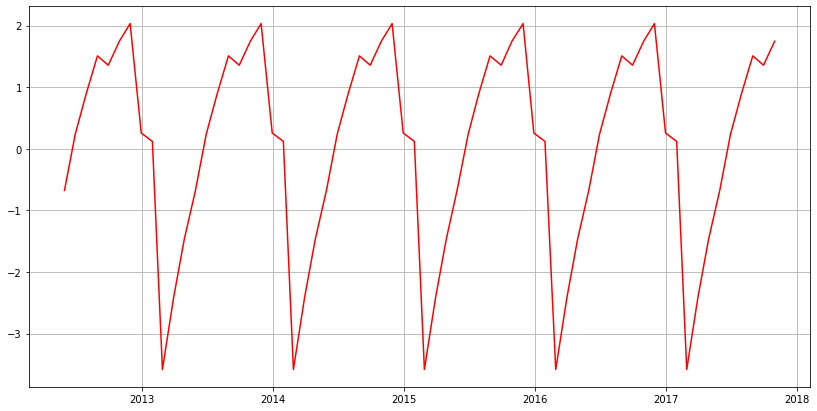

In [62]:
plt.figure(figsize=(14,7))
plt.plot(df['seasonal'],color='red')
plt.grid(True)
plt.show()

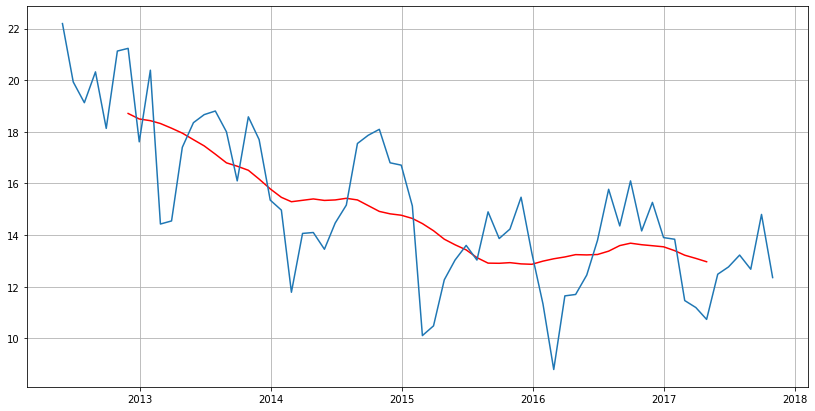

In [61]:
plt.figure(figsize=(14,7))
plt.plot(df['trend'],color='red')
plt.plot(df['observed'])
plt.grid(True)
plt.show()